In this module, we explore the topic of **manifold learning**.

We have seen that PCA is a flexible dimensionality reduction technique, yet it does not perform too well when there are nonlinear relationships within the data. To address this deficiency, we can turn to a class of unsupervised methods known as manifold learning. The goal is to seek to describe datasets as low-dimensional manifold embedded in high-dimensional spaces. The word manifold requires a rigorous definition. But here let's make the concept a bit simple: when you think of a manifold, you can treat the word 'manifold' as a generalization of some kind of surfaces. Here, imagine a sheet of paper: this is a two-dimensional object that lives in our three-dimensional world, and can be bent or folded or rollled in that two dimensions. In the parlance of manifold learning, we can think of this sheet as a two-dimensional manifold embedded in a three-dimensional space. If you think about approaches like PCA, you will realize that we are projecting the data onto some low-dimensional surface. But this is restrictive in the sense that those surfaces are all linear. What if the the best representation lies in some weirdly shaped surface? PCA will totally miss that, and this is where the word 'manifold learning' kicks in. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high. Although the data points may consist of thousands of features, they may be described as a function of only a few underlying parameters. That is, the data points are actually samples from a low-dimensional manifold that is embedded in a high-dimensional space. Manifold learning algorithms attempt to uncover these parameters in order to find a low-dimensional representation of the data.

Rotating, re-orienting, or stretching the piece of paper in three-dimensional space doesn't change the flat geometry of the paper: such operations are akin to linear embeddings. If you bend, curl, or crumple the paper, it is still a two-dimensional manifold, but the embedding into the three-dimensional space is no longer linear. Manifold learning algorithms would seek to learn about the fundamental two-dimensional nature of the paper, even as it is contorted to fill the three-dimensional space. 

There are many manifold learning algorithms, such as multidimensional scaling (MDS), Laplacian eigenmaps, semidefinite embedding, local linear embedding (LLE), isometric mapping (isomap), polynomial PCA, kernel PCA, t-distributed stochastic neighbor embedding (t-SNE), uniform manifold approximation and projection (UMAP) etc. In this lecture, we focus on MDS. 

### I. What is a Manifold

To understand what a manifold is, we need some mathematical definitions.

In the mathematical field of topology, a **homeomorphism**, or topological isomorphism, or bicontinuous function is a continuous function between topological spaces that has a continuous inverse function. Homeomorphisms are the isomorphisms in the category of topological spaces, that is, they are the mappings that preserve all the topological properties of a given space. Two spaces with a homeomorphism between them are called homeomorphic, and from a topological viewpoint they are the same. A self-homeomorphism is a homeomorphism from a topological space onto itself. "Being homeomorphic" is an equivalence relation on topological spaces. Its equivalence classes are called **homeomorphism classes**.

A **manifold** is a topological space that locally resembles Euclidean space near each point. More precisely, each point of an n-dimensional manifold has a neighborhood that is homeomorphic to the Euclidean space of dimension n. In this more precise terminology, a manifold is referred to as an n-manifold. Informally, a manifold is a space that is "modeled on" Euclidean space.

Here comes the formal definition. A **chart** for a topological space $M$ (also called a **coordinate chart**, **coordinate patch**, **coordinate map**, or **local frame**) is a homeomorphism $\varphi$ from an open subset $G$ of $M$ to an open subset of a Euclidean space. The chart is traditionally recorded as the ordered pair $(G,\varphi)$. An **atlas** consists of individual charts that, roughly speaking, describe individual regions of the manifold. For instance, if the manifold is the surface of the Earth, then an atlas has its more common meaning. Formally, an atlas for a topological space $M$ is an indexed family $\{G_{\alpha}, \varphi_{\alpha} : \alpha \in I \}$ of charts on $M$ which covers $M$, that is, $\cup_{\alpha \in I} G_{\alpha} \supseteq M$. If the codomain of each chart is the n-dimensional Euclidean space, then $M$ is said to be an n-dimensional manifold. Notice that the plural of atlas is atlases, although some authors use atlantes.

Although a manifold locally resembles Euclidean space, meaning that every point has a neighborhood homeomorphic to an open subset of Euclidean space, globally it may be not homeomorphic to Euclidean space. For example, the surface of the sphere is not homeomorphic to the Euclidean plane, because (among other properties) it has the global topological property of compactness that Euclidean space lacks. The concept of a manifold is central to many parts of geometry and modern mathematical physics because it allows complicated structures to be described and understood in terms of the simpler local topological properties of Euclidean space. Manifolds naturally arise as solution sets of systems of equations and as graphs of functions.

There are many different kinds of manifolds, depending on the context. In geometry and topology, all manifolds are topological manifolds, possibly with additional structure, such as a differentiable structure. A manifold can be constructed by giving a collection of coordinate charts, that is a covering by open sets with homeomorphisms to a Euclidean space, and patching functions: homeomorphisms from one region of Euclidean space to another region if they correspond to the same part of the manifold in two different coordinate charts. A manifold can be given additional structure if the patching functions satisfy axioms beyond continuity. For instance, differentiable manifolds have homeomorphisms on overlapping neighborhoods diffeomorphic with each other, so that the manifold has a well-defined set of functions which are differentiable in each neighborhood, and so differentiable on the manifold as a whole.

As a motivating example, a surface is a two dimensional manifold, meaning that it locally resembles the Euclidean plane near each point. For example, the surface of a globe can be described by a collection of maps (charts), which together form an atlas of the globe. Although no individual map is sufficient to cover the entire surface of the globe, any place in the globe will be in at least one of the charts. Many places will appear in more than one chart. For example, a map of North America will likely include parts of South America and the Arctic circle. These regions of the globe will be described in full in separate charts, which in turn will contain parts of North America. There is a relation between adjacent charts, called a transition map that allows them to be consistently patched together to cover the whole of the globe. Describing the coordinate charts on surfaces explicitly requires knowledge of functions of two variables, because these patching functions must map a region in the plane to another region of the plane. However, one-dimensional examples of manifolds (or curves) can be described with functions of a single variable only.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from matplotlib.image import imread
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from mpl_toolkits import mplot3d


%matplotlib inline

In [2]:
os.chdir("C:\\Users\\GAO\\GAO_Jupyter_Notebook\\Datasets")

### II. A Demo of MDS on the 'HELLO' Visualization

To make these concepts more clear, let's start by generating some 2D datat hat can use to define a manifold. Here is a function that will create data in the shape of the word 'HELLO':

In [3]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    # from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

Let's call the function and get the resulting data. The output is a 1000-by-2 array consisting points drawn in the sahpe of the word 'HELLO'. 

(-0.20958628725849313,
 4.20520327441312,
 0.004247488586063178,
 1.0154103562523111)

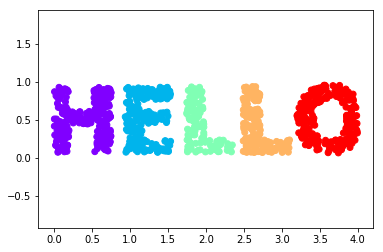

In [4]:
X = make_hello(1000) # X is a 1000-by-2 numpy array
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal')

Looking at data like this, we can see the particular choice of the x and y values of the dataset are not the most fundamental description ofthe data: we can scale, shrink, or rotate the data and you can still reconigze the word 'HELLO'. Let's play with this shape. Rember in linear algebra, a rotation matrix is a matrix that is used to perform a rotation in Euclidean space. For example, using the convention below, the matrix $R = R(\theta) = \begin{pmatrix} \cos{\theta} & -\sin{\theta} \\ \sin{\theta} & \cos{\theta} \end{pmatrix}$ rotates points in the xy-plane counterclockwise through an angle $\theta$ with respect to the x axis about the origin of a two-dimensional Cartesian coordinate system. To perform the rotation on a plane point with standard coordinates $v' = (x,y)$, it should be written as column vector, and multiplied by the matrix: $Rv$. One can also easily verify that the rotation matrix is orthgonal and has a determinant value equal to $\pm 1$.

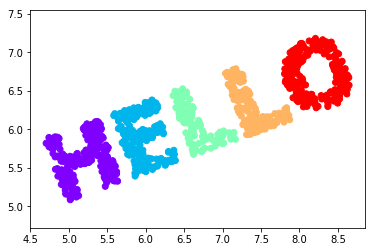

In [5]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

X_rotated = rotate(X, 20) + 5
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], **colorize)
plt.axis('equal');

This tells us that the x and y values are not necessarily fundamental to the relationships in the data. What is fundamental, in this case, is the distance between each point and the other points in the dataset. A common way to represent this is to use a distance matrix: for $N$ points, we construct an $N \times N$ array such that entry $(i, j)$ contains the distance between point $i$ and point $j$. Let's use Scikit-Learn's efficient pairwise_distances function to do this for our original data:

In [6]:
Delta = pairwise_distances(X)
Delta.shape # the distance matrix is 1000-by-1000

(1000, 1000)

In Euclidean geometry, a rotation is an example of an **isometry**, a transformation that moves points without changing the distances between them. Rotations are distinguished from other isometries by two additional properties: they leave (at least) one point fixed, and they leave "handedness" unchanged. By contrast, a **translation** moves every point, a **reflection** exchanges left- and right-handed ordering, and a **glide reflection** does both (a glide reflection is a symmetry operation that consists of a reflection over a line and then translation along that line, combined into a single operation).

More formally, Let $X$ and $Y$ be metric spaces equipped with respective metrics $\rho_{X}$ and $\rho_{Y}$. A map $f: X \longrightarrow Y$ is called an isometry or distance preserving if for any $a,b \in X$ one has $\rho_{Y}(f(a),f(b))=\rho_{X}(a,b)$. A **global isometry**, or **isometric isomorphism**, is a bijective isometry. Like any other bijection, a global isometry has a function inverse. The inverse of a global isometry is also a global isometry.

The distance matrix above $\Delta = pairwise\_distances(X)$ gives us a representation of our data that is invariant to rotations and translatoins, but the visualization of the matrix above won't be entirely intuitive. Furthermore, computing the distance matrix from the (x,y) coordinates is straightforward, but transforming the distances back into x and y coordinates is rather difficult. This is exactly when MDS comes in.

Model stress:  2.4649859891373125


(-2.070223239613712,
 2.1307991701641122,
 -1.3777423146786318,
 1.3776009759940204)

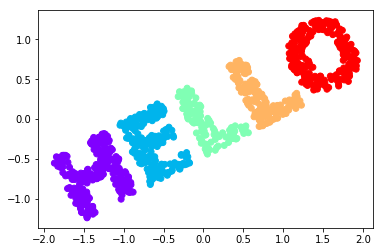

In [7]:
model = MDS(n_components=2, dissimilarity='precomputed', metric=True, random_state=1)
out = model.fit_transform(Delta)
print('Model stress: ', model.stress_)
plt.scatter(out[:,0], out[:,1], **colorize)
plt.axis('Equal')

The fit_transform() method fits the data from the original data matrix $X$, and returns the embedded coordinates. The argument 'n_components' denotes the number of dimensions in which to immerse the dissimilarities. The argument 'metric' dictates whether we are doing metric or non-metric scaling. This example essentially shows that the MDS algorithm can recover the original data using only the distance matrix describing the relationship between the data points. 

One can also use the idea to reduce dimensionality, bringing high dimension data $K$ to a lower dimension $r$, where usually $r = 2, 3$. For example, instead of simply rotating the data in the two-dimensional plane, we can project it into three dimensions using the following function (essentially a 3D generalization of the rotation matrix used earlier). Rotation in 3D settings has a close relationship with matrix eigen analysis. We will not elaborate here.

In [8]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T)) # solving an ordinary or generalized eigenvalue problem for a complex Hermitian matrix
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)
X3.shape  

(1000, 3)

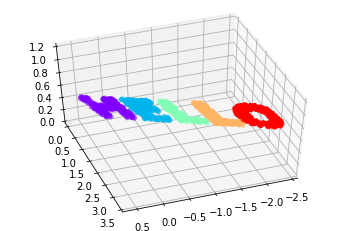

In [9]:
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2], **colorize)
ax.view_init(azim=70, elev=50)

We can now ask the MDS estimator to input this three-dimensional data, compute the distance matrix, and then determine the optimal two-dimensional embedding for this distance matrix. The result recovers a representation of the original data. This is essentially the goal of MDS: given high dimensional embedded data, it seeks a low-dimensional representation of data that preserves certain relationships within the data. 

Model stress:  2.464985989355287


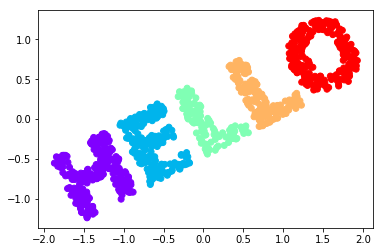

In [10]:
model2 = MDS(n_components=2, random_state=1)
out3 = model2.fit_transform(X3)
print('Model stress: ', model2.stress_)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

### III.  When MDS Fails

Our discussion thus far has considered linear embeddings, which essentially consist of rotations, translations, and scalings of data into higher-dimensional spaces. Where MDS breaks down is when the embedding is nonlinear—that is, when it goes beyond this simple set of operations. Consider the following embedding, which takes the input and contorts it into an "S" shape in three dimensions. This is again three-dimensional data, but we can see that the embedding is much more complicated:

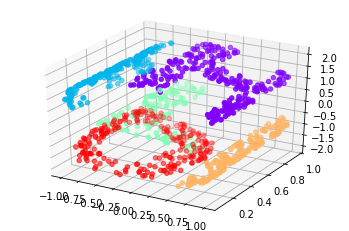

In [11]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize)

The fundamental relationships between the data points are still there, but this time the data has been transformed in a nonlinear way: it has been wrapped-up into the shape of an "S." If we try a simple MDS algorithm on this data, it is not able to "unwrap" this nonlinear embedding, and we lose track of the fundamental relationships in the embedded manifold:

(-2.1377439587859004,
 1.9525966315357823,
 -1.9667872566209708,
 1.7978925909661028)

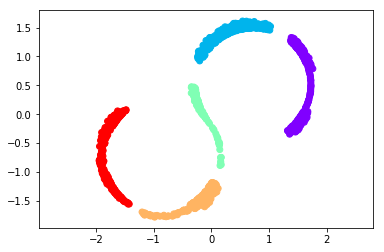

In [12]:
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal')

As you see, the best two-dimensional linear embeding does not unwrap the S-curve, but instead throws out the original y-axis.

References:
   - https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
   - https://prateekvjoshi.com/2014/06/21/what-is-manifold-learning/
   - https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html
   - https://en.wikipedia.org/wiki/Rotation_matrix#In_three_dimensions
   